In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
fontsize = 15

In [3]:
def getangles(startangle, newangle, count, f):
    '''
    Recursive algorithm that generates new surfaces from old ones
    Input arguments: 
        Starting angle (startangle)
        Perturbation to it (newangle)
        Number of layers (count)
        A dampening factor that reduces the perturbation with each new layer (f)

    '''    
    if count == 0:
        return (startangle,)
    return (*getangles(startangle+newangle,newangle/f,count-1,f), \
            *getangles(startangle-newangle,newangle/f,count-1,f))

In [4]:
# Parameters for a run
startangle = 0
newangle_degrees = -1
newangle = newangle_degrees*np.pi/180
rpercent = 4
rfactor = 1+rpercent/100

<IPython.core.display.Javascript object>


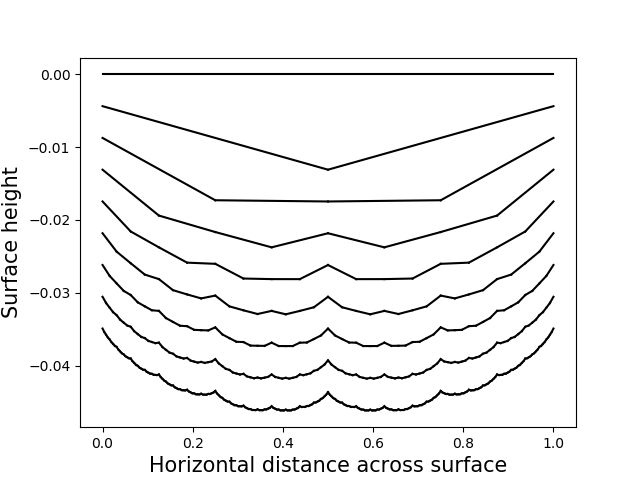

Text(0,0.5,'Surface height')

In [5]:
# Get a short list of angles and graph what the surface looks like

# Specify the maximum number of layers
maxcount = 9

# String them together and graph
plt.figure()
unitdistance = 1.0
offsety = unitdistance*np.tan(newangle)/4 # This factor determines how packed together the graphs are
for count in range(maxcount):
    thisone = np.tan(getangles(startangle,newangle,count,rfactor))
    length = len(thisone)
    distancex = unitdistance/length
    startx = 0.0
    starty = offsety*count
    for i in range(len(thisone)):
        xline = np.array([startx,startx+distancex])
        distancey = distancex*thisone[i]
        yline = np.array([starty,starty+distancey])
        plt.plot(xline, yline,'k')
        startx += distancex
        starty += distancey
plt.xlabel('Horizontal distance across surface',fontsize=fontsize)
plt.ylabel('Surface height',fontsize=fontsize)

Angles in histogram:  [ 4.55286123  6.42523422  7.85288205  9.04894183 10.09617744 11.03713952
 11.89716739 12.692812   13.43559848 14.1339394 ]


<IPython.core.display.Javascript object>


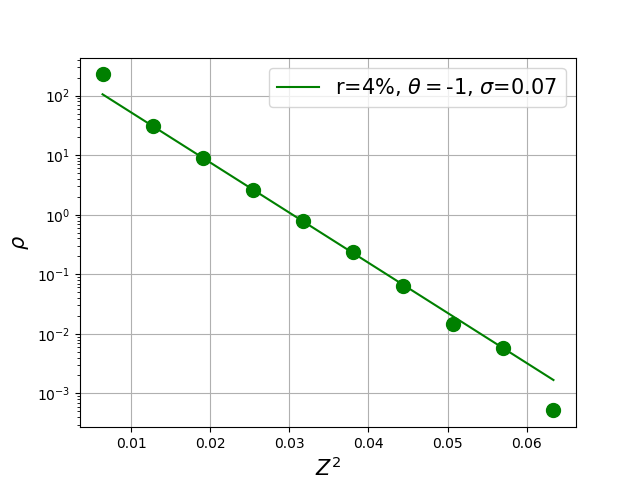

Text(0,0.5,'$\\rho$')

In [6]:
# Make a probability distribution function from a many-layer sequence

# Specify the number of layers
count = 20

# Get gradient-squared
Z2 = (np.tan(getangles(startangle,newangle,count,rfactor)))**2
hist = np.histogram(Z2)
Z2fromhist = hist[1][1:]; #print(Z2fromhist)
rhofromhist = hist[0]; #print(rhofromhist)
norm = np.trapz(rhofromhist,Z2fromhist); #print(norm)
rhofromhist = rhofromhist/norm
ikeep = np.nonzero(rhofromhist)
Z2fromhistkeep = Z2fromhist[ikeep]; #print(Z2fromhistkeep)
logrhofromhistkeep = np.log(rhofromhist[ikeep]); #print(logrhofromhistkeep)
rhofromhistkeep = np.exp(logrhofromhistkeep)

# This is just interesting ... what are the angles that come out of the histogram?
thetafromhist = np.arctan(Z2fromhist**.5)*180/np.pi
print('Angles in histogram: ', thetafromhist)

# Graph it
plt.figure()
plt.semilogy(Z2fromhistkeep,rhofromhistkeep,'og',markersize=10)

# Graph a best-fit line too
thisrange = [i for i in range(1,7)]
p1 = np.polyfit(Z2fromhistkeep[thisrange],logrhofromhistkeep[thisrange],1)
best_sigma1 = 1/np.sqrt(-p1[0])
label_sigma1 = 'r='+str(rpercent)+r'%, $\theta=$'+str(newangle_degrees)+r', $\sigma$='+str(np.round(best_sigma1*100)/100) 
plt.semilogy(Z2fromhistkeep,np.exp(np.polyval(p1,Z2fromhistkeep)),'g', label=label_sigma1)

# Cosmetics
plt.legend(fontsize=fontsize)
plt.grid(True)
plt.xlabel('$Z^2$',fontsize=fontsize)
plt.ylabel(r'$\rho$',fontsize=fontsize)